In [22]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 


In [4]:
path = r"/home/vinay/code/Machine_Learning/customer_satisfaction_score/data/train.csv"
df  = pd.read_csv(path)


                           order_id                       customer_id  \
0  f4a225b924b4cf6e2021d3a7eb5c109c  74e60ab3ea7f793b69d43edca2ddb3db   
1  90ef0dd46322c07d322754512bf6b9b5  cc8ad3c4ae16891646c7f40bc2be5f5f   
2  0a36bd172604d49ae57f2ae440a0dc70  c7079118b666659ab965232b538299af   
3  18bafb91a9e78b83e54eb5aa495a955f  2b35618d386d5d8a6aa0a063343575f9   
4  7c7a7c7d1fa3b3c8f867224389d3d8bd  6ae6a02cb961932c6c3b32f1d03612d2   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2018-07-04 08:09:10  2018-07-05 16:35:13   
1    delivered      2018-08-14 10:15:39  2018-08-15 03:25:28   
2    delivered      2018-07-27 20:36:15  2018-07-27 20:50:08   
3    delivered      2017-08-14 12:24:28  2017-08-14 12:50:12   
4    delivered      2017-07-20 11:28:26  2017-07-20 11:43:43   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2018-07-05 19:16:00           2018-07-06 13:21:54   
1          2018-08-16 12:05:00           2018-08

In [7]:
OBVIOUS_FEATURES = [
                    'order_id',   
                    'customer_id',        
                    'customer_unique_id',    
                    'product_id',           
                    'seller_id',        
                    'product_photos_qty', 
                    'customer_zip_code_prefix',
                    'order_item_id',
                    'product_category_name',
                 ]

for feature in OBVIOUS_FEATURES:
    print(df[feature].nunique())
    

79248
79248
77002
28558
2914
19
14269
19
71


In [27]:
num_features = df.select_dtypes(include=['number'])
num_features.columns

Index(['payment_sequential', 'payment_installments', 'payment_value',
       'customer_zip_code_prefix', 'order_item_id', 'price', 'freight_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'review_score'],
      dtype='object')

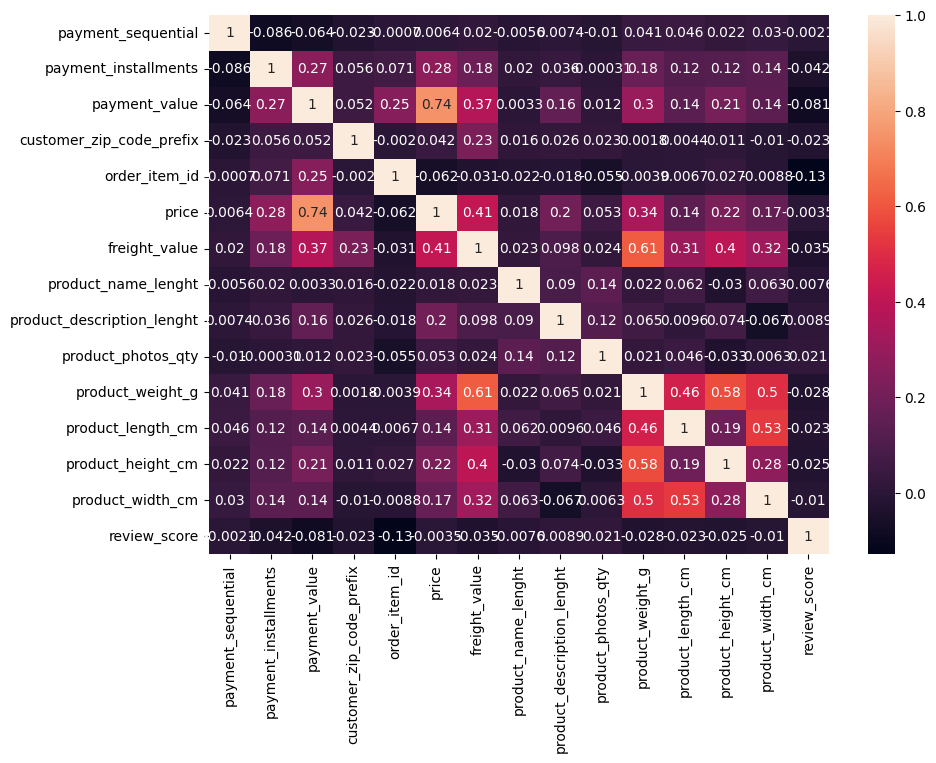

In [33]:
plt.figure(figsize=(10, 7))
sns.heatmap(num_features.corr(), annot=True)
plt.show()



In [46]:
target_col  = "review_score"
plt.figure(figsize=(8, 6))

for feature in num_features:
    # fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # # Histogram with KDE
    # sns.histplot(df[feature], kde=True, bins=30, ax=axes[0])
    # axes[0].set_title(f"Distribution of {feature}")

    # # Scatter plot with Review Score
    # sns.scatterplot(x=df[feature], y=df[target_col], alpha=0.5, ax=axes[1])
    # axes[1].set_title(f"Correlation of {feature} with {target_col}")

    # plt.tight_layout()
    # plt.show()
    sns.heatmap(df[[target_col] + num_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
plt.show()

ValueError: Unable to coerce to Series, length must be 15: given 1

<Figure size 800x600 with 0 Axes>

Numeric Features: ['payment_sequential', 'payment_installments', 'payment_value', 'customer_zip_code_prefix', 'order_item_id', 'price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
Target Column: review_score


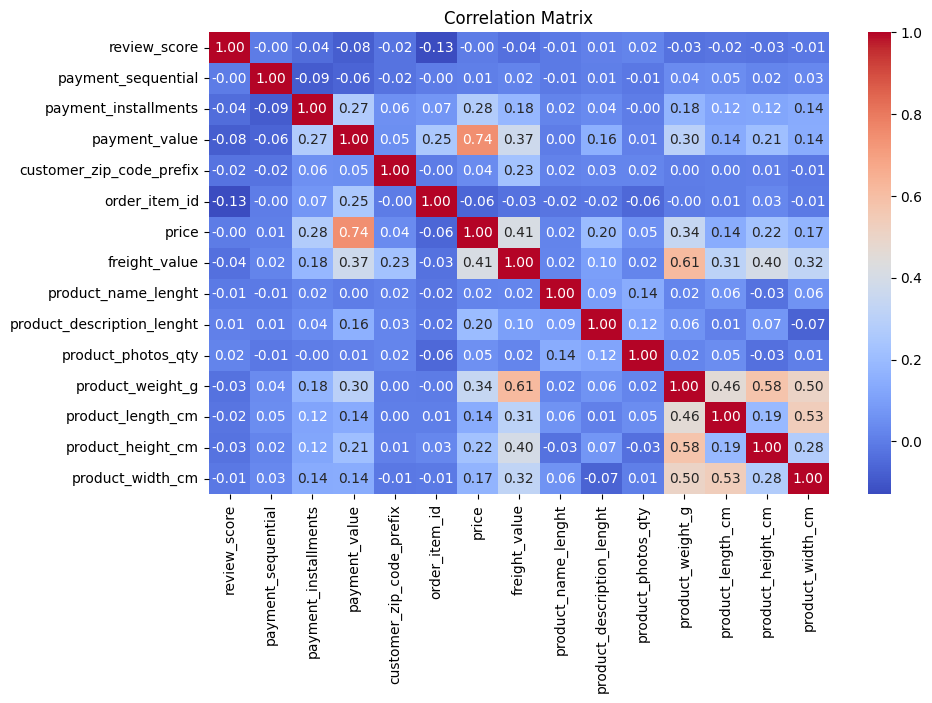

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numeric features
num_features = df.select_dtypes(include=['number']).columns.tolist()

# Ensure 'review_score' is included if it's the target column
target_col = 'review_score'  # Change if your column has a different name
if target_col not in df.columns:
    raise ValueError(f"Column '{target_col}' not found in DataFrame.")

# Ensure we exclude any non-numeric or problematic columns
if target_col in num_features:
    num_features.remove(target_col)

# Verify the selected columns
print("Numeric Features:", num_features)
print("Target Column:", target_col)

# Compute correlation matrix correctly
corr_matrix = df[[target_col] + num_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


/tmp/ipykernel_54788/1779675005.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["review_score"], y=df[feature], ax=axes[1], palette="coolwarm")


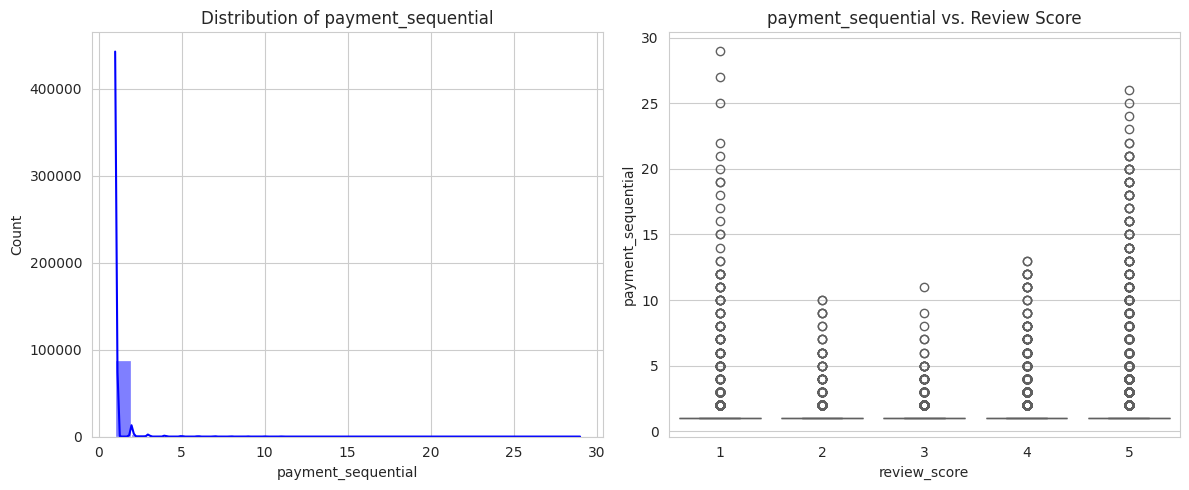

/tmp/ipykernel_54788/1779675005.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["review_score"], y=df[feature], ax=axes[1], palette="coolwarm")


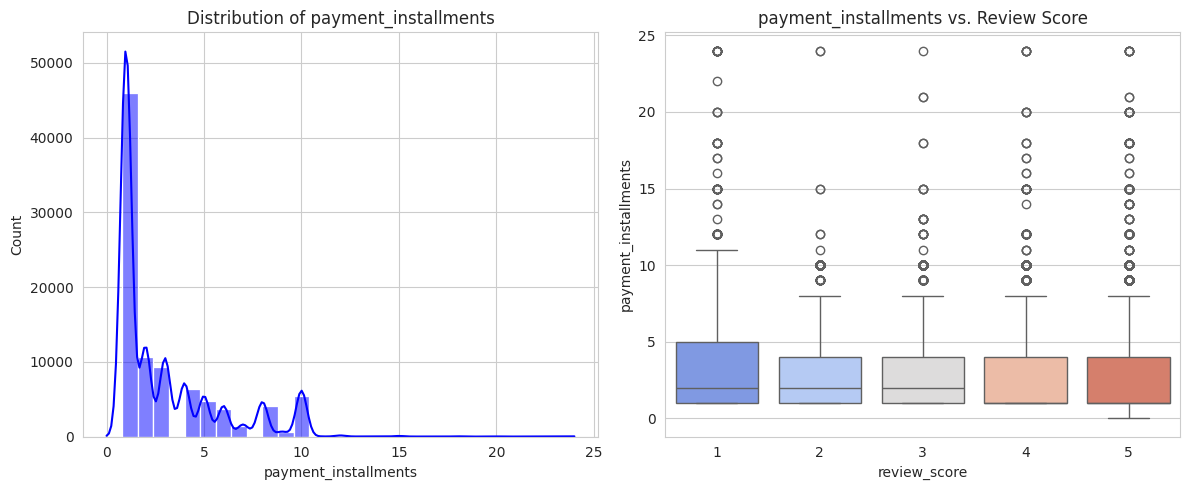

/tmp/ipykernel_54788/1779675005.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["review_score"], y=df[feature], ax=axes[1], palette="coolwarm")


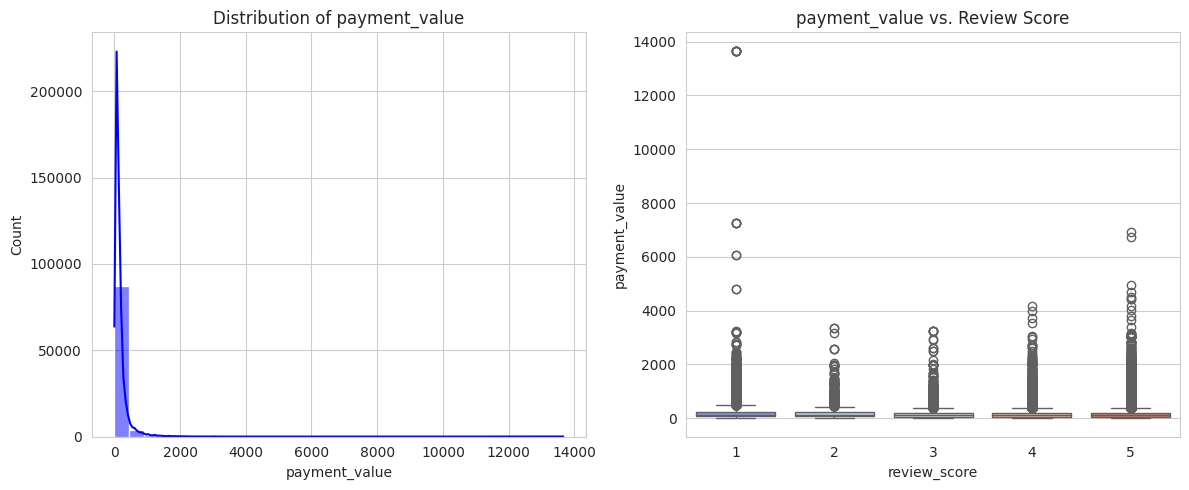

/tmp/ipykernel_54788/1779675005.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["review_score"], y=df[feature], ax=axes[1], palette="coolwarm")


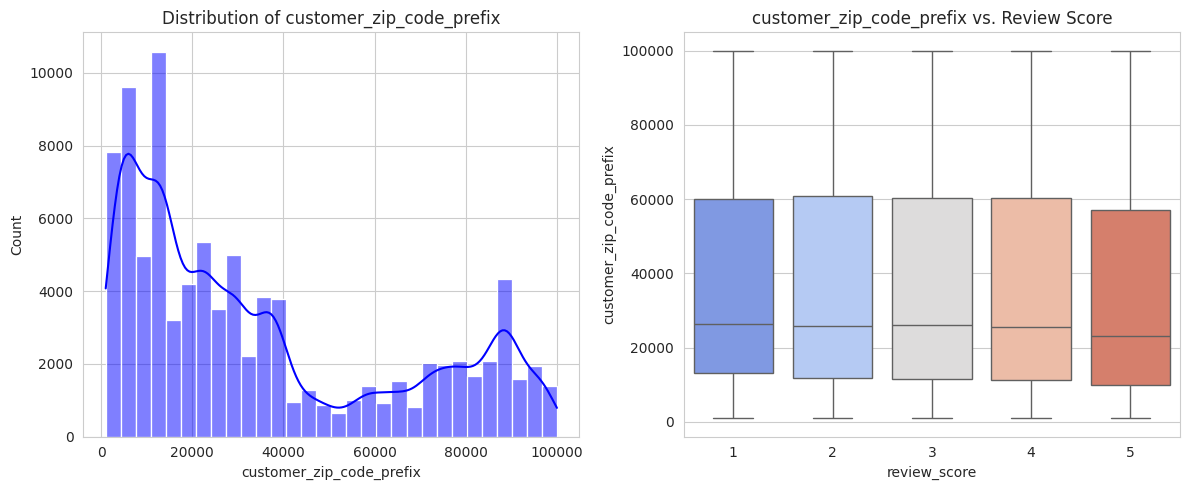

/tmp/ipykernel_54788/1779675005.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["review_score"], y=df[feature], ax=axes[1], palette="coolwarm")


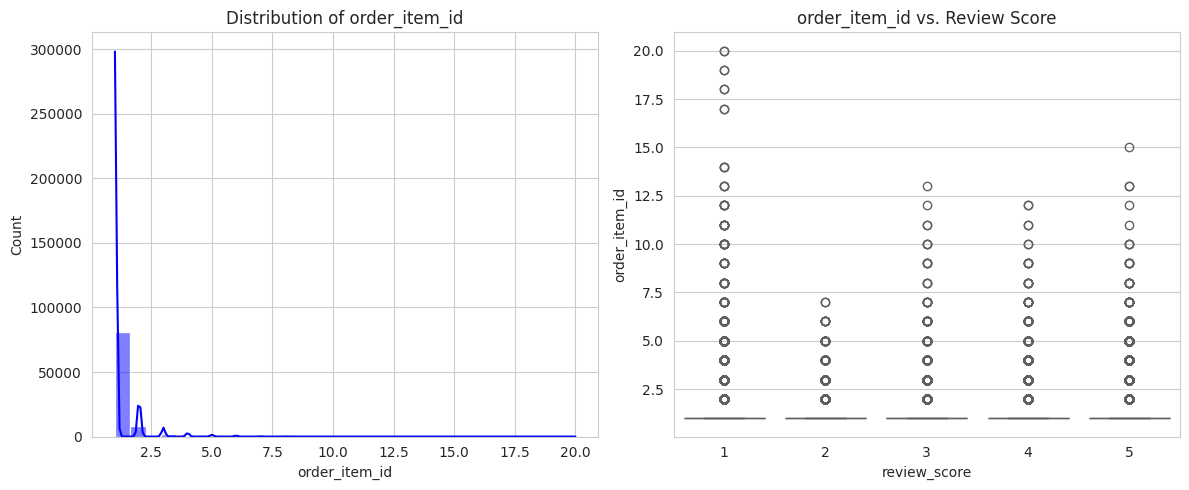

/tmp/ipykernel_54788/1779675005.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["review_score"], y=df[feature], ax=axes[1], palette="coolwarm")


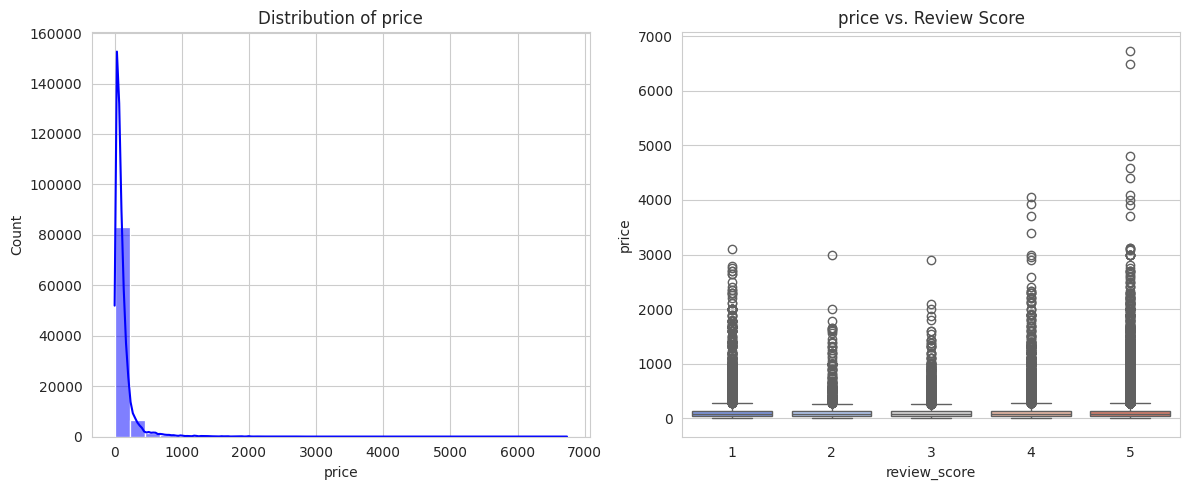

/tmp/ipykernel_54788/1779675005.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["review_score"], y=df[feature], ax=axes[1], palette="coolwarm")


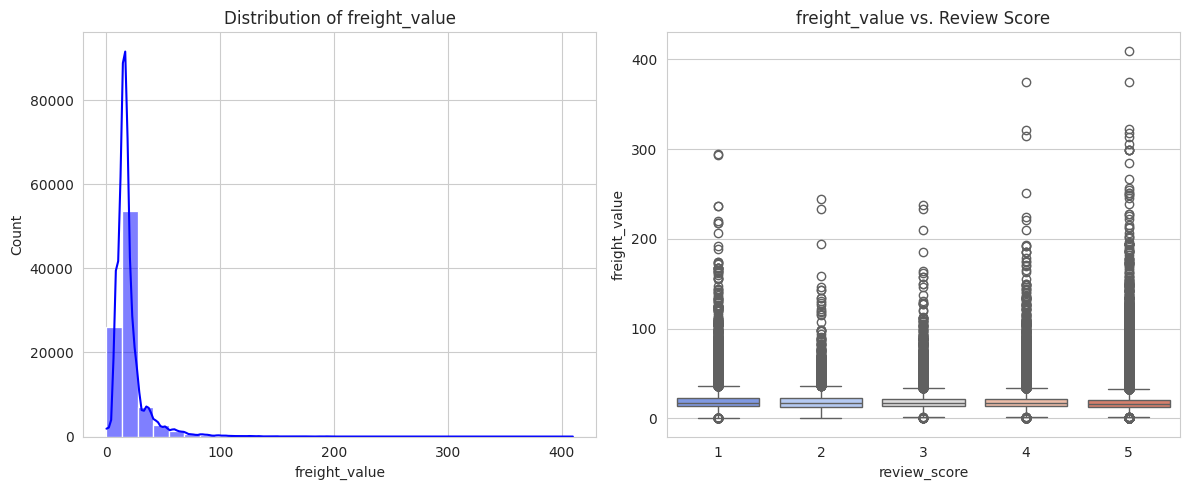

/tmp/ipykernel_54788/1779675005.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["review_score"], y=df[feature], ax=axes[1], palette="coolwarm")


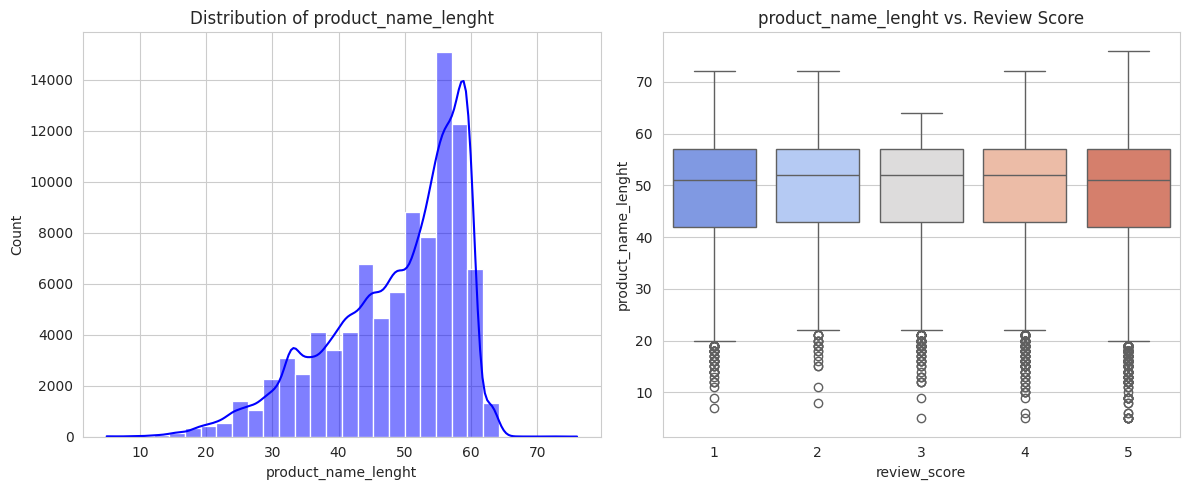

/tmp/ipykernel_54788/1779675005.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["review_score"], y=df[feature], ax=axes[1], palette="coolwarm")


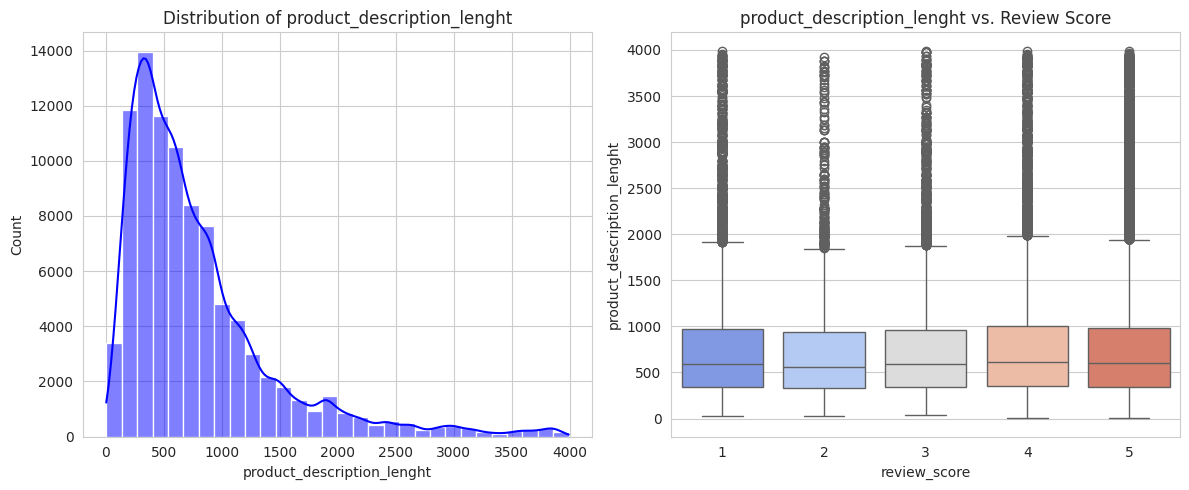

/tmp/ipykernel_54788/1779675005.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["review_score"], y=df[feature], ax=axes[1], palette="coolwarm")


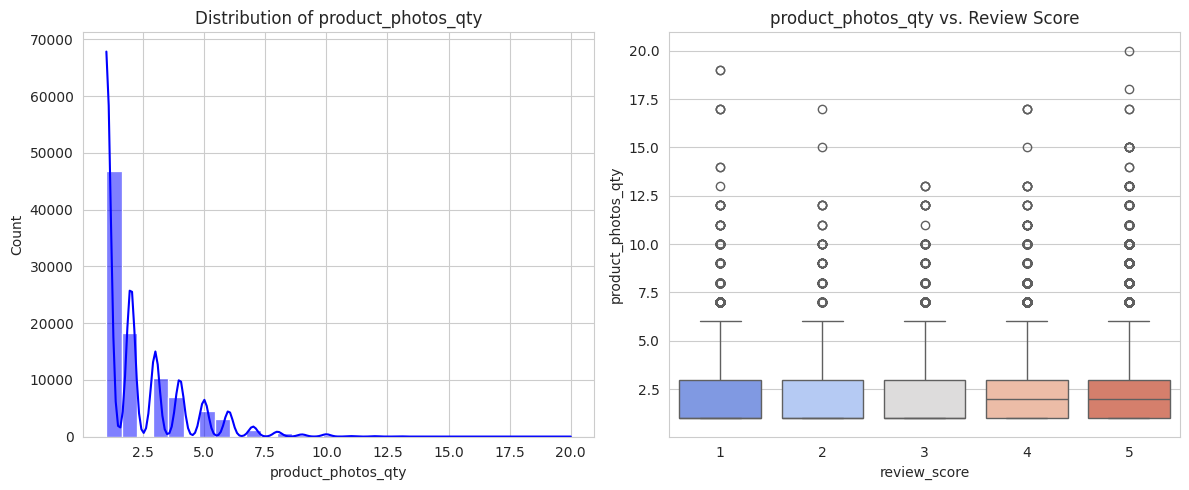

/tmp/ipykernel_54788/1779675005.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["review_score"], y=df[feature], ax=axes[1], palette="coolwarm")


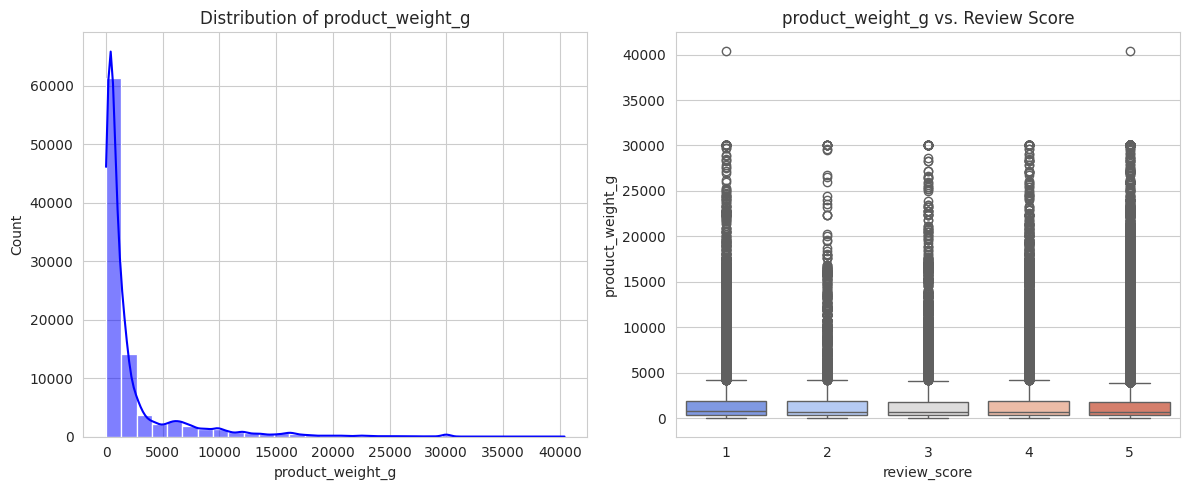

/tmp/ipykernel_54788/1779675005.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["review_score"], y=df[feature], ax=axes[1], palette="coolwarm")


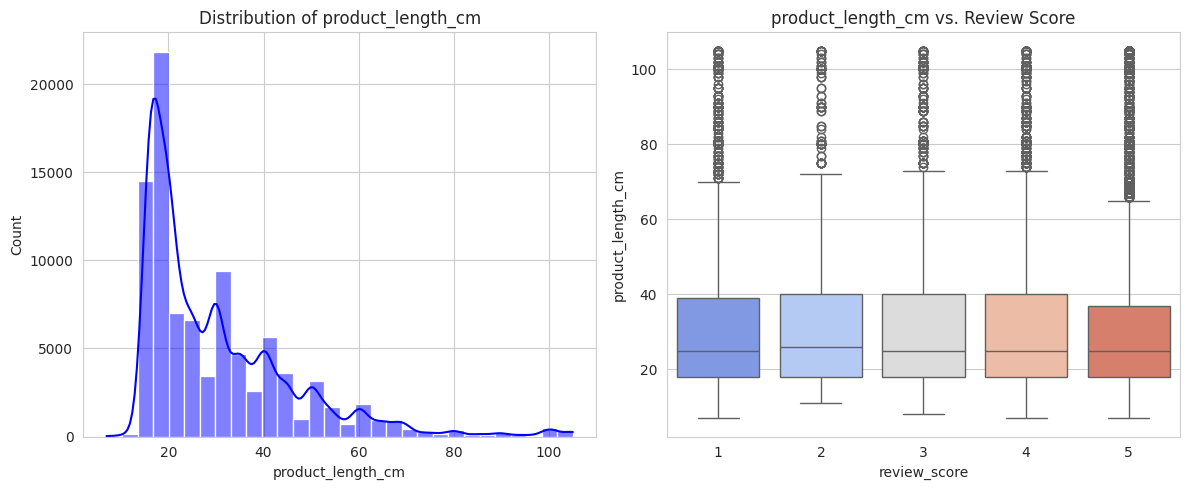

/tmp/ipykernel_54788/1779675005.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["review_score"], y=df[feature], ax=axes[1], palette="coolwarm")


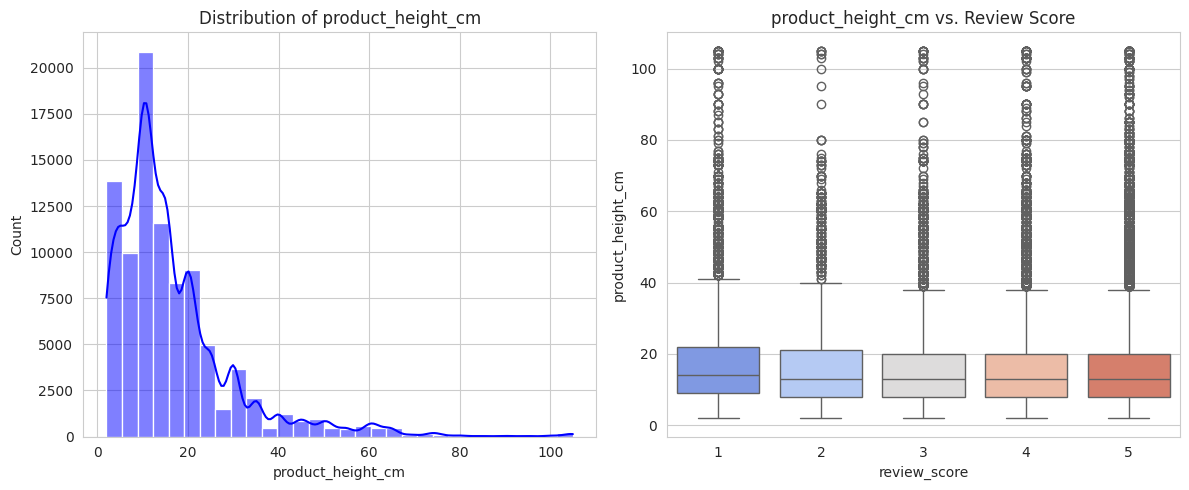

/tmp/ipykernel_54788/1779675005.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["review_score"], y=df[feature], ax=axes[1], palette="coolwarm")


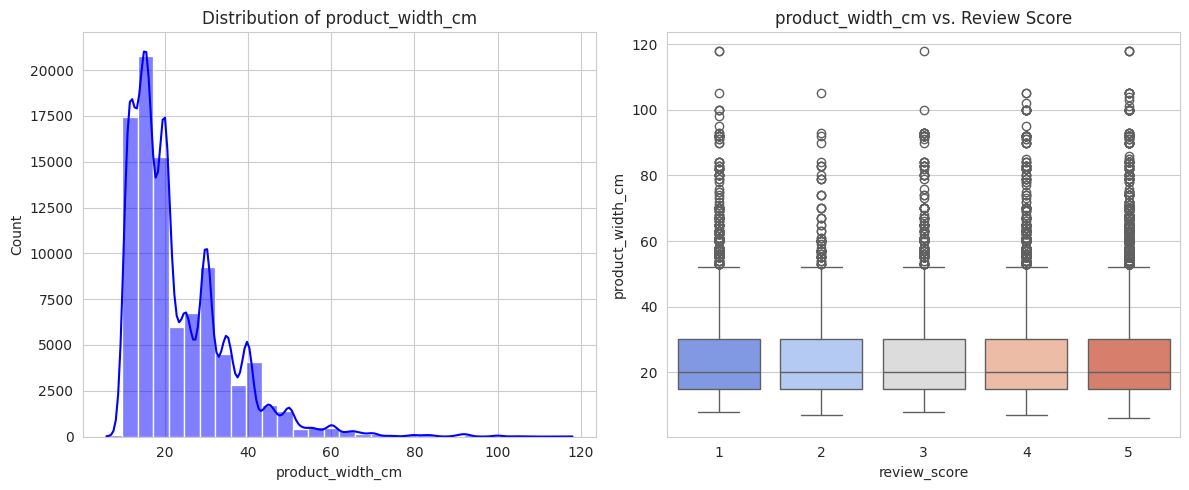

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# List of numerical features excluding review_score
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_features.remove("review_score")  # Remove target variable

# Create subplots
for feature in num_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Distribution plot
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[0], color='blue')
    axes[0].set_title(f"Distribution of {feature}")

    # Boxplot for correlation with review_score
    sns.boxplot(x=df["review_score"], y=df[feature], ax=axes[1], palette="coolwarm")
    axes[1].set_title(f"{feature} vs. Review Score")

    plt.tight_layout()
    plt.show()
